# Python for Probability: Bridging the Gap Between Math and Code

![bus-meme.jpeg](media/bus-meme.jpeg)


In this notebook, we will explore key concepts in probability theory, solve challenging probability problems using Python, and apply Monte Carlo simulations for real-world applications.

We will use the following libraries:
- `random`: For random number generation.
- `numpy`: For handling arrays and numerical operations.
- `scipy`: For probability distributions and statistical functions.
- `matplotlib`: For data visualization.

# Why Python?

![python-supreme.jpeg](media/python-supreme.jpeg) ![python-meme.jpeg](media/python-meme.jpeg)

In [146]:
print("hello world!")

hello world!


## Basic Probability Theory

![Standard_deviation_diagram_micro.svg.png](media/normal.png)

Probability is a branch of mathematics that deals with the likelihood of events occurring. Let's start with some basic definitions:

- **Probability of an event**: A measure of the likelihood of an event happening, denoted as $P(A)$.
- **Sample space (S)**: The set of all possible outcomes.
- **Random variable (X)**: A variable that takes different values based on the outcomes of a random experiment.

### **Probability of an Event**

In probability theory, the probability of an event is a measure of how likely the event is to occur. It is a value between 0 and 1, where:
- **0** means the event will not occur.
- **1** means the event will certainly occur.

The **probability of an event (A)**, denoted by $P(A)$, is calculated as the ratio of the **number of favorable outcomes** to the **total number of possible outcomes** in the sample space.

#### **Formula for Probability:**

$$
P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}
$$

Where:
- **Favorable outcomes**: The outcomes that result in the event you’re interested in.
- **Total outcomes**: The total number of possible outcomes in the sample space.

#### **Example 1: Coin Toss**
- If you toss a fair coin, there are two possible outcomes: **Heads** or **Tails**.
- The event "getting Heads" has **1 favorable outcome** (Heads).
- The **total number of outcomes** is 2 (Heads, Tails).

The probability of getting Heads is:

$$
P(\text{Heads}) = \frac{1}{2} = 0.5
$$

#### **Example 2: Rolling a Die**
- A fair 6-sided die has 6 possible outcomes: **1, 2, 3, 4, 5, 6**.
- If the event is "rolling a 3," there is only **1 favorable outcome** (3).
- The **total number of outcomes** is 6.

The probability of rolling a 3 is:

$$
P(\text{Rolling a 3}) = \frac{1}{6} \approx 0.1667
$$

#### **Key Takeaways:**
- The probability of any event is always a value between 0 and 1.
- If all outcomes are equally likely, the probability is simply the ratio of favorable outcomes to total outcomes.

This is the basic principle of calculating probabilities and forms the foundation for more complex probability calculations.

## The Python Standard Library » Numeric and Mathematical Modules » random — Generate pseudo-random numbers

### random — Generate pseudo-random numbers
Source code: Lib/random.py

This module implements pseudo-random number generators for various distributions.

Almost all module functions depend on the basic function random(), which generates a random float uniformly in the half-open range 0.0 <= X < 1.0. Python uses the Mersenne Twister as the core generator. 

In [147]:
import random

## Hello World for Probability: Simple Coin Toss

Let's calculate the probability of getting heads when tossing a fair coin.

In [73]:
import random

coin = ["H", "T"]

# Function to simulate a single coin toss
def coin_toss():
    return random.choice(coin)

N = 10

# Simulate tossing the coin 100 times
tosses = [coin_toss() for _ in range(N)]
print(tosses)

# Calculate probability of heads
heads_prob = tosses.count('H') / N
print(f"Probability of Heads: {heads_prob:.2f}")

['H', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'H']
Probability of Heads: 0.40


### Visualization

Let's visualize the probability distribution as a function of N

![image.png](media/import.png)

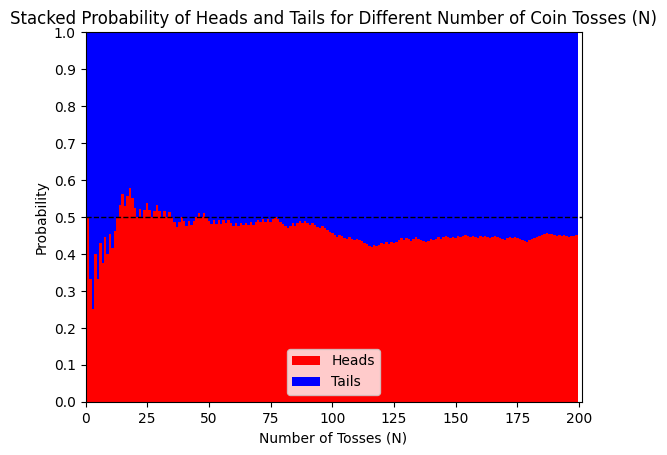

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a series of coin tosses using numpy random.choice
def coin_tosses(num_tosses):
    # Simulate tosses: 'H' for Heads, 'T' for Tails
    return np.random.choice(['H', 'T'], size=num_tosses)

# Function to calculate the count of Heads and Tails as a function of N tosses
def simulate_coin_tosses(num_tosses):
    tosses = coin_tosses(num_tosses)
    heads_count = np.cumsum(tosses == 'H')  # Cumulative count of 'H' (Heads)
    tails_count = np.cumsum(tosses == 'T')  # Cumulative count of 'T' (Tails)

    heads_probabilities = heads_count / np.arange(1, num_tosses + 1)
    tails_probabilities = tails_count / np.arange(1, num_tosses + 1)
    
    return heads_probabilities, tails_probabilities

np.random.seed(69)
toss_counts = 200

# Get the probability of Heads and Tails for each N
heads_probabilities, tails_probabilities = simulate_coin_tosses(toss_counts)

# Plot the stacked bar graph for the probabilities of Heads and Tails for each N
bar_width = 1
index = np.arange(toss_counts)
plt.bar(index, heads_probabilities, bar_width, label='Heads', color='red')
plt.bar(index, tails_probabilities, bar_width, bottom=heads_probabilities, label='Tails', color='blue')

# Customizing the graph
plt.xlim(0,toss_counts+1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.title("Stacked Probability of Heads and Tails for Different Number of Coin Tosses (N)")
plt.xlabel("Number of Tosses (N)")
plt.ylabel("Probability")
plt.legend()
plt.show()

## **Laws of Probability**


![laws-of-probability.png](media/laws-of-probability.png)

### **1. Complement Rule**  
The **Complement Law** states that the probability of an event **not occurring** is:  

$$
P(A^c) = 1 - P(A)
$$

where:  
- $ P(A) $ is the probability of event $ A $ occurring.  
- $ P(A^c) $ is the probability of event $ A $ **not occurring**.  

---


### **2. Addition Rule**
- If $ A $ and $ B $ are two events, the probability of either occurring is:
  $$
  P(A \cup B) = P(A) + P(B) - P(A \cap B)
  $$
- If $ A $ and $ B $ are mutually exclusive (no overlap), then:
  $$
  P(A \cup B) = P(A) + P(B)
  $$

---

### **3. Multiplication Rule**
- If $ A $ and $ B $ are independent events:
  $$
  P(A \cap B) = P(A) P(B)
  $$
- If they are dependent:
  $$
  P(A \cap B) = P(A) P(B | A)
  $$
  where $ P(B | A) $ is the conditional probability of $ B $ given $ A $.

---

### **4. Bayes’ Theorem**
- Used for updating probabilities when new evidence is introduced:
  $$
  P(A | B) = \frac{P(B | A) P(A)}{P(B)}
  $$
- Example: Medical testing (probability of having a disease given a positive test result).


## **Important Probability Distributions**

![distributions.png](media/distributions.png)

### **1. Uniform Distribution**
- A distribution where all outcomes are equally likely.
- If $ X $ follows a uniform distribution between $ a $ and $ b $, it is denoted as:
  $$
  X \sim U(a, b)
  $$
- **Probability Density Function (PDF)**:
  $$
  f(x) = \frac{1}{b - a}, \quad a \leq x \leq b
  $$
- Example: Rolling a fair die (each face has equal probability of 1/6).

---

### **2. Normal (Gaussian) Distribution**
- A bell-shaped curve commonly found in real-world data.
- Denoted as:
  $$
  X \sim N(\mu, \sigma^2)
  $$
  where $ \mu $ is the mean and $ \sigma^2 $ is the variance.
- **Probability Density Function (PDF)**:
  $$
  f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
  $$
- Example: Heights of people, IQ scores.

---

### **3. Binomial Distribution**
- Models the number of successes in $ n $ independent trials.
- Denoted as:
  $$
  X \sim B(n, p)
  $$
  where $ p $ is the probability of success in each trial.
- **Probability Mass Function (PMF)**:
  $$
  P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}
  $$
- Example: Tossing a fair coin $ n $ times and counting the number of heads.

---

### **4. Poisson Distribution**
- Models the number of events in a fixed time/space interval when they occur independently.
- Denoted as:
  $$
  X \sim \text{Poisson}(\lambda)
  $$
  where $ \lambda $ is the average number of events per interval.
- **Probability Mass Function (PMF)**:
  $$
  P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
  $$
- Example: Number of emails received per hour.

## **Uniform Distribution and Python’s `random()` Function**  

![uniform.png](media/uniform.png)

### **What is Uniform Distribution?**  
A **uniform distribution** is a probability distribution where **all outcomes are equally likely**. In the **continuous case**, the probability density function (PDF) is:  

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & a \leq x \leq b \\
0, & \text{otherwise}
\end{cases}
$$

where:
- $ a $ is the lower bound
- $ b $ is the upper bound  

### **Python’s `random()` Function**
The function `random.random()` in Python **generates a random float** uniformly in the range **\[0.0, 1.0)**.  

It is based on the **Mersenne Twister algorithm**, which is a **pseudo-random number generator (PRNG)** with a period of $ 2^{19937} - 1 $, ensuring **high-quality randomness**.

### **Example: Generating Uniform Random Numbers**

In [75]:
import random

# Generate 5 random numbers uniformly distributed in [0, 1)
random_numbers = [random.random() for _ in range(5)]
print(random_numbers)

[0.8907613652062257, 0.17212123326950068, 0.6476756313763062, 0.7080302438295336, 0.42289777300658427]


### **Using NumPy for Uniform Distribution**
The NumPy equivalent is `numpy.random.uniform(a, b, size)`, which generates values in $ [a, b) $.

In [76]:
import numpy as np

# Generate 10 random numbers from U(2, 8)
random_numbers = np.random.uniform(2, 8, 10)
print(random_numbers)

[6.14516089 5.24210854 5.50586265 5.62499428 3.8408776  7.15708038
 2.4028739  7.07406229 5.39470464 3.36926162]


### **Visualizing Uniform Distribution**  
Now, let’s plot a histogram to see how values are uniformly spread:

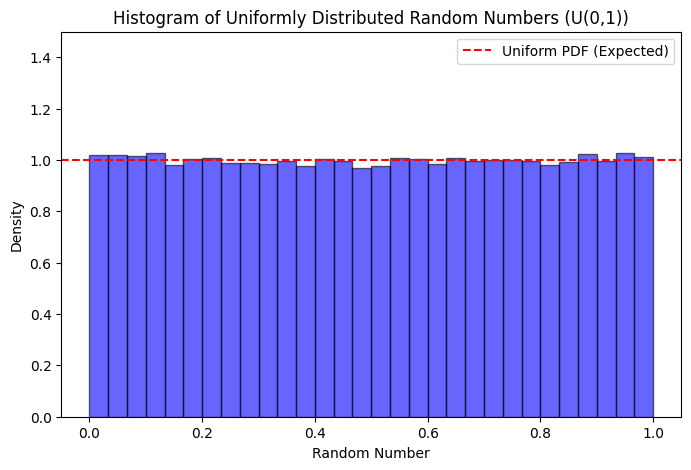

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 random numbers from U(0,1)
np.random.seed(69)
data = np.random.uniform(0, 1, 100000)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
plt.axhline(y=1, color='red', linestyle="--", label="Uniform PDF (Expected)")
plt.ylim(0, 1.5)
plt.title("Histogram of Uniformly Distributed Random Numbers (U(0,1))")
plt.xlabel("Random Number")
plt.ylabel("Density")
plt.legend()
plt.show()

### **Monte Carlo Simulation Using Uniform Random Numbers**  

Monte Carlo methods use **random sampling** to estimate numerical results. Since `random.random()` generates values uniformly in $[0,1)$, we can use it in various simulations.

### **1. Estimating π Using Uniform Random Numbers**
One classic Monte Carlo simulation is estimating **π** by randomly sampling points in a unit square and checking how many fall inside the unit circle.

#### **Idea**:
- Generate **random points** $ (x, y) $ in the square $[-1,1] \times [-1,1]$.
- Count how many points lie inside the circle and thus satisfy $ x^2 + y^2 \leq 1 $
- The ratio of points inside to total points approximates **π**, so:

$$
\pi \approx 4 \times \frac{\text{Points inside circle}}{\text{Total points}}
$$


Estimated π ≈ 3.13480


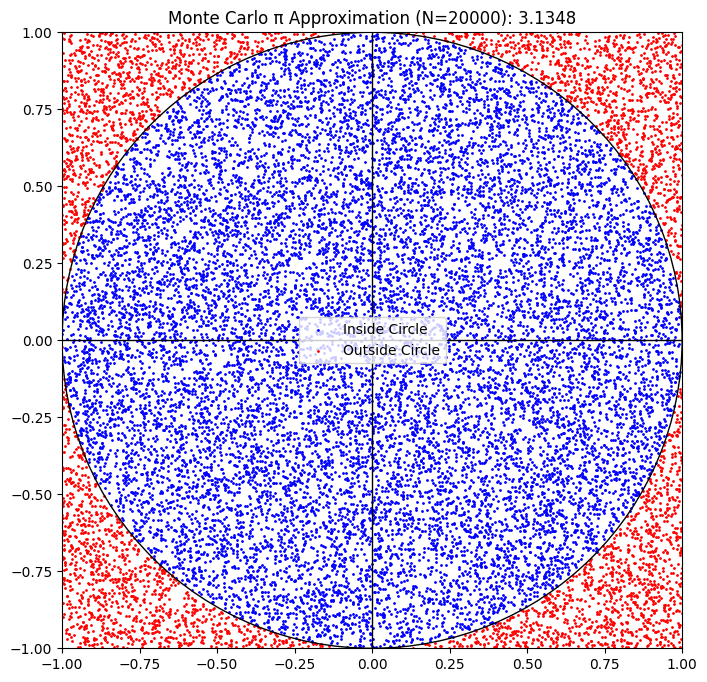

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random points
np.random.seed(420)
N = 20000

# Generate N random (x, y) points
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# Check if points fall inside the unit circle (quarter-circle)
inside_circle = x**2 + y**2 <= 1

# Estimate π
pi_estimate = 4 * np.sum(inside_circle) / N
print(f"Estimated π ≈ {pi_estimate:.5f}")

# Visualization
plt.figure(figsize=(8, 8))
plt.scatter(x[inside_circle], y[inside_circle], color="blue", s=1, label="Inside Circle")
plt.scatter(x[~inside_circle], y[~inside_circle], color="red", s=1, label="Outside Circle")
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
circle = plt.Circle((0, 0), 1, color="black", fill=False)
plt.gca().add_patch(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f"Monte Carlo π Approximation (N={N}): {pi_estimate}")
plt.legend()
plt.show()

## **Convergence of Monte Carlo π Estimate**  

1. We **vary $ N $ logarithmically** from **10 to 1,000,000**.
2. For each $ N $:
   - Generate $ N $ random points $ (x, y) $ in $[0,1] \times [0,1]$.
   - Count how many fall **inside** the quarter-circle.
   - Compute **π approximation** as $ 4 \times \frac{\text{inside points}}{N} $.
3. We **plot π estimates** as a function of $ N $, using a **log scale** on the x-axis.
4. A **dashed red line** shows the actual value of **π**.


Here’s the **convergence plot** for π as a function of $ N $, showing how the Monte Carlo estimate improves as we increase the number of random points.  

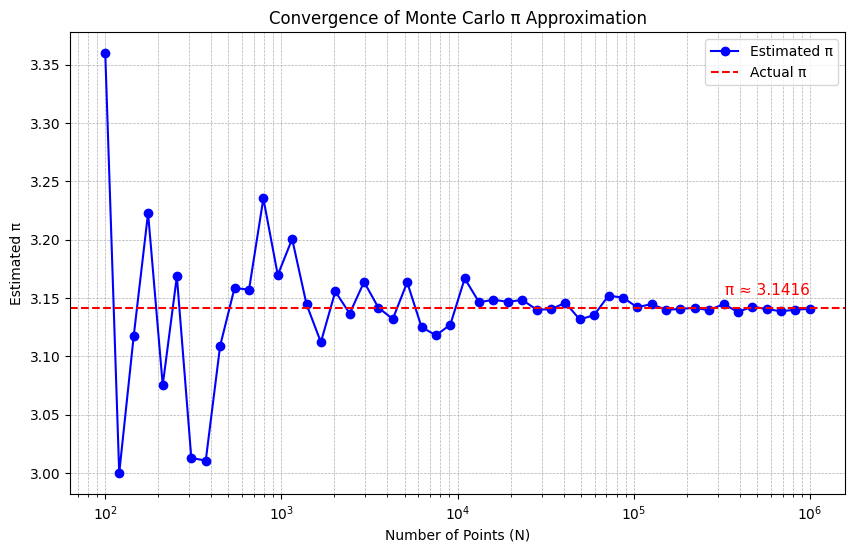

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of N values (powers of 10)
np.random.seed(69)
N_values = np.logspace(2, 6, dtype=int)  # From 10 to 1,000,000

pi_estimates = []  # Store estimated π values

# Monte Carlo simulation for different N values
for N in N_values:
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    pi_estimate = 4 * inside_circle / N
    pi_estimates.append(pi_estimate)

# Plot convergence of π
plt.figure(figsize=(10, 6))
plt.plot(N_values, pi_estimates, marker='o', linestyle='-', color='blue', label="Estimated π")
plt.axhline(y=np.pi, color='red', linestyle="--", label="Actual π")
plt.xscale('log')  # Log scale for better visualization
plt.text(N_values[-1], 3.15, "π ≈ 3.1416", color="red", fontsize=11, verticalalignment="bottom", horizontalalignment="right")
plt.xlabel("Number of Points (N)")
plt.ylabel("Estimated π")
plt.title("Convergence of Monte Carlo π Approximation")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### **What is a Pseudo-Random Number Generator (PRNG)?**  

A **Pseudo-Random Number Generator (PRNG)** is an algorithm that produces sequences of numbers that **appear random** but are actually **deterministic** and generated using a mathematical function.  

PRNGs are **not truly random** because they start from an initial **seed value** and follow a defined algorithm to generate the next number in the sequence.

---

### **1. How PRNGs Work**
1. **Start with a seed** $ S_0 $ (a fixed starting value).
2. **Apply a recurrence relation** to generate new values:
   \[
   S_{n+1} = f(S_n)
   \]
   where $ f $ is a deterministic function.
3. **Output the generated sequence**, which appears random but is fully predictable if the seed is known.

---

### **2. Example: Linear Congruential Generator (LCG)**
A simple PRNG is the **Linear Congruential Generator (LCG)**:

\[
X_{n+1} = (aX_n + c) \mod m
\]

where:
- $ X_n $ is the current number,
- $ a $, $ c $, and $ m $ are constants.

Example in Python:
```python
def lcg(seed, a=1664525, c=1013904223, m=2**32):
    """Simple Linear Congruential Generator (LCG)"""
    return (a * seed + c) % m

# Generate a sequence
seed = 42
random_numbers = [seed]
for _ in range(10):
    seed = lcg(seed)
    random_numbers.append(seed / 2**32)  # Normalize to [0,1)
    
print(random_numbers)
```
⚠️ **LCG is not cryptographically secure** but is used in many applications.

---

### **3. Python’s `random` Module and Mersenne Twister PRNG**
- **Python’s `random` module** uses the **Mersenne Twister (MT19937)** algorithm.
- It has a **long period of $ 2^{19937} - 1 $** and high statistical quality.
- It's **not cryptographically secure** (for security, use `secrets` or `os.urandom`).

Example:
```python
import random

random.seed(42)  # Setting a fixed seed
print(random.random())  # Generates a pseudo-random float in [0,1)
```
✅ The same seed will always produce the same sequence of numbers.

---

### **4. True Random vs. Pseudo-Random**
| Feature           | PRNG (Pseudo-Random) | True Random (TRNG) |
|------------------|---------------------|--------------------|
| **Deterministic** | ✅ Yes (if seed known) | ❌ No |
| **Reproducible** | ✅ Yes | ❌ No |
| **Speed** | ⚡ Fast (Purely algorithmic) | 🐢 Slower (Hardware-based) |
| **Source** | Algorithm (e.g., Mersenne Twister) | Physical randomness (e.g., radioactive decay, thermal noise) |
| **Used in** | Simulations, games, Monte Carlo | Cryptography, security keys |

For cryptographic applications, **use `secrets` module**:
```python
import secrets
print(secrets.randbits(32))  # Generate a cryptographically secure 32-bit number
```

---

### **5. When to Use PRNG vs. True Random**
| Use Case | PRNG (`random`) | True Random (`secrets`, Hardware RNG) |
|----------|----------------|----------------|
| Monte Carlo simulations | ✅ Yes | ❌ No |
| Games (random events, dice rolls) | ✅ Yes | ❌ No |
| Machine learning (random initialization) | ✅ Yes | ❌ No |
| Cryptographic key generation | ❌ No | ✅ Yes |
| Secure password generation | ❌ No | ✅ Yes |

---

### **6. Summary**
- **PRNGs** generate sequences that look random but are deterministic.
- **Python’s `random` module** uses **Mersenne Twister (MT19937)**.
- **For cryptographic security**, use `secrets` or hardware-based randomness.
- **PRNGs are widely used** in simulations, games, and AI.

Would you like an example of how **PRNGs affect machine learning or cryptography**? 🚀

References:

By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713